# Chapter 1_5 定序回归
----
author: W.Y.  
first_edition: 2020/1/16  
last_edition: 2020/1/21  
description: 王汉生老师书的第五章，定序回归的python极简实现  

----

In [2]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 画图模块
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf  
import statsmodels.api as sma
import lmdiag  
from sklearn import metrics


In [3]:
# 导入数据

data = pd.read_csv('E:/Data Mining/SimplePython/Chapter 1 从R到Python/CH 1_5 定序回归/CH 1_5 data ceilphone.csv')

In [4]:
data.head()

,score,W1,W2,W3,W4,W5,W6,W7
0,3,Nokia,0,0,0,1,1,3
1,4,Nokia,1,0,1,0,1,5
2,4,Nokia,0,1,1,0,0,7
3,4,Bird,1,1,0,1,0,3
4,3,Bird,0,0,0,0,1,5


In [5]:
w1_table = pd.crosstab(index=data['score'], columns=data['W1'], values=data['score'], aggfunc='count')
print(w1_table)

W1     Bird  Motorola  Nokia  Samsung
score                                
1        37        24     34       26
2        80        64     53       66
3        98       138    132      133
4       109       108    116       96
5        28        30     35       44


Text(0.5, 1.0, 'Digital Camera')

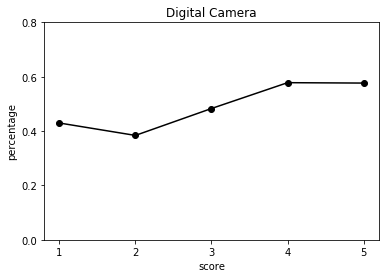

In [6]:
plt.plot(data.groupby('score')['W2'].mean(),'o-',color='black')
plt.xticks(range(1,6,1))
plt.yticks(np.arange(0,1,0.2))
plt.xlabel('score')
plt.ylabel('percentage')
plt.title('Digital Camera')

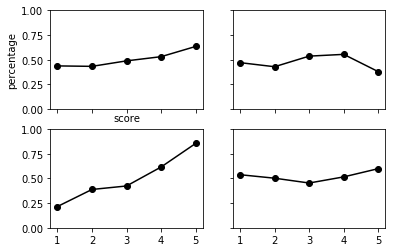

In [7]:
fig, ax = plt.subplots(2,2,sharex='all', sharey='all')
ax[0][0].plot(data.groupby('score')['W3'].mean(),'o-',color='black')
ax[0][0].set_ylim(0,1)
ax[0][0].set_xlabel('score')
ax[0][0].set_ylabel('percentage')
ax[0][1].plot(data.groupby('score')['W4'].mean(),'o-',color='black')
ax[1][0].plot(data.groupby('score')['W5'].mean(),'o-',color='black')
ax[1][1].plot(data.groupby('score')['W6'].mean(),'o-',color='black')


In [8]:
w7_table = pd.crosstab(index=data['score'], columns=data['W7'], values=data['score'], aggfunc='count')
print(w7_table)

W7       3    5    7
score               
1       25   67   29
2       71  113   79
3      169  187  145
4      155  111  163
5       64    9   64


In [30]:
model1 = smf.probit('score ~ W1 + W2 + W3 + W4 + '
                   'W5 + W6 + W7', data).fit()

print(model1.summary())

ValueError: endog must be in the unit interval.

In [26]:
X = pd.DataFrame(data, columns=['W2', 'W3'])

In [27]:
import mord
mul_lr = mord.OrdinalRidge(alpha=1.0,
                           fit_intercept=True,
                           normalize=False,
                           copy_X=True,
                           max_iter=None,
                           tol=0.001,
                           solver='auto').fit(X, data['score'])


In [ ]:
probit1 = smf.probit('ST ~ ARA + ASSET + ATO + GROWTH + '
                   'LEV + ROA + SHARE', data1999).fit()

print(probit1.summary())

In [12]:
logit2 = smf.logit('ST ~ ARA + GROWTH + LEV', data1999).fit()

print(logit2.summary())

Optimization terminated successfully.
         Current function value: 0.185699
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                     ST   No. Observations:                  684
Model:                          Logit   Df Residuals:                      680
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Jan 2020   Pseudo R-squ.:                 0.09939
Time:                        10:02:27   Log-Likelihood:                -127.02
converged:                       True   LL-Null:                       -141.04
                                        LLR p-value:                 3.572e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6022      0.565     -8.152      0.000      -5.709      -3.496
ARA            5.1301      1.

In [13]:
probit2 = smf.probit('ST ~ ARA + GROWTH + LEV', data1999).fit()

print(probit2.summary())

Optimization terminated successfully.
         Current function value: 0.184984
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                     ST   No. Observations:                  684
Model:                         Probit   Df Residuals:                      680
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Jan 2020   Pseudo R-squ.:                  0.1029
Time:                        10:02:28   Log-Likelihood:                -126.53
converged:                       True   LL-Null:                       -141.04
                                        LLR p-value:                 2.226e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4468      0.262     -9.342      0.000      -2.960      -1.933
ARA            2.7331      0.

In [14]:
prob_logit = logit1.predict(exog = data2000)

In [15]:
matrix_logit_1 = metrics.confusion_matrix(data2000['ST'], np.where(prob_logit > 0.5, 1, 0), labels=[0,1])
print(pd.DataFrame(matrix_logit_1))

     0  1
0  699  0
1   47  0


In [16]:
matrix_logit_2 = metrics.confusion_matrix(data2000['ST'], np.where(prob_logit > 0, 1, 0), labels=[0,1])
print(pd.DataFrame(matrix_logit_2))

   0    1
0  0  699
1  0   47


In [17]:
matrix_logit_3 = metrics.confusion_matrix(data2000['ST'], np.where(prob_logit > 0.05, 1, 0), labels=[0,1])
print(pd.DataFrame(matrix_logit_3))


     0    1
0  504  195
1   18   29


In [ ]:
# 计算模型的准确率
accuracy = cm.diagonal().sum()/cm.sum()
accuracy

In [18]:
# 绘制ROC曲线
fpr, tpr, _ = metrics.roc_curve(data2000['ST'], np.where(prob_logit > 0.05, 1, 0))
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

In [24]:
pred = np.array(np.arange(0,1,0.01))

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl  
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
def plot_roc(labels, predict_probs, titles):
    color = ['r', 'g', 'b', 'y']                                                                 
    shape = ['o', 'v', '^']   
    
    for idx, predict_prob in enumerate(predict_probs):
        false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
        roc_auc=auc(false_positive_rate, true_positive_rate)
        plt.title('ROC')
        c = color[idx%len(color)]                                                                     
        s = shape[idx%len(shape)]
        plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC K:{} = {:.4}'.format(titles[idx], roc_auc), color=c, marker=s, markevery=20)  
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.ylabel('TPR')
        plt.xlabel('FPR')
plot_roc(pca_test_label, predict_probs)

ValueError: Found input variables with inconsistent numbers of samples: [746, 100]